**Hyperparameter Tuning**

Import dependencies

In [ ]:
import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Set random seed for purposes of reproducibility

In [ ]:
seed = 21

Now let's load in the dataset. We can do so simply by specifying which variables we want to load the data into, and then using the load_data() function:

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Summarize our datasets

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


Let's visualize the data. We can do this by using matplotlibs imshow() method. This allows us to see that the images are grainy and it may be difficult to extract features from this dataset without the use of NN

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


(32, 32, 3)


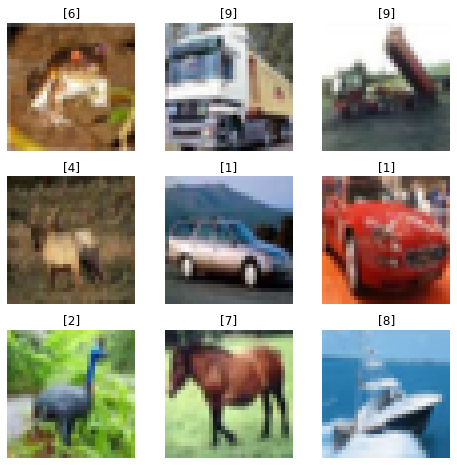

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(3, 3, 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
	plt.title(y_train[i])
	plt.axis('off')
# show the figure
print(X_train.shape[1:])
plt.show()

Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255. The division will happen in the first neural network layer

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

The Numpy command to_categorical() is used to one-hot encode. This is why we imported the np_utils function from Keras, as it contains to_categorical().

We also need to specify the number of classes that are in the dataset, so we know how many neurons to compress the final layer down to:

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

When we displayed the images, we also recieved the image size. Here we are creating width and height variables.

In [ ]:
img_height=32
img_width=32

Code snippet from the source code. We did not change anything about this layer

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

This is the neural network. We have used the same layers that were in the source code for this ICP. We quadrupeled the number of filters that the Conv2D() layers use and have changed the final output layer to have activation of softmax.

In [ ]:
num_classes = 10

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

Compile the model. We removed the paramater 'from_logits=true' because the softmax function doesn't output logits.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

Summarize the model

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

Fit the model. Here we have changed the model to have 35 epochs and a batch size of 200. We found that these gave good accuracy. Increasing these further only gave marginal improvements.

In [ ]:
epochs=35
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=200)

Epoch 1/35
250/250 [==============================] - 11s 41ms/step - loss: 1.6610 - accuracy: 0.3955 - val_loss: 1.3176 - val_accuracy: 0.5275
Epoch 2/35
250/250 [==============================] - 10s 40ms/step - loss: 1.3184 - accuracy: 0.5317 - val_loss: 1.3130 - val_accuracy: 0.5494
Epoch 3/35
250/250 [==============================] - 10s 39ms/step - loss: 1.1827 - accuracy: 0.5800 - val_loss: 1.1014 - val_accuracy: 0.6219
Epoch 4/35
250/250 [==============================] - 10s 40ms/step - loss: 1.0907 - accuracy: 0.6156 - val_loss: 0.9890 - val_accuracy: 0.6597
Epoch 5/35
250/250 [==============================] - 10s 39ms/step - loss: 1.0287 - accuracy: 0.6384 - val_loss: 0.9176 - val_accuracy: 0.6835
Epoch 6/35
250/250 [==============================] - 10s 39ms/step - loss: 0.9785 - accuracy: 0.6571 - val_loss: 0.9337 - val_accuracy: 0.6712
Epoch 7/35
250/250 [==============================] - 10s 39ms/step - loss: 0.9411 - accuracy: 0.6697 - val_loss: 0.8398 - val_accuracy:

Evaluate the model. We can get an accuracy by evaluating the model. This is unchanged from the source code.

In [ ]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.31%


Plot the model. This was taken directly from the source code.

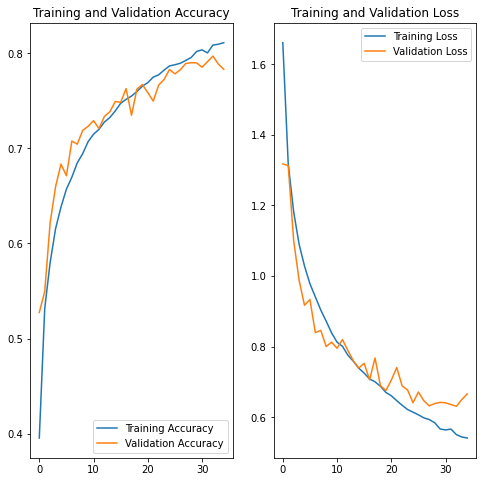

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Clear the Keras session so that we can cleanly run the model again

In [ ]:
from keras.backend import clear_session
clear_session()

**Validating the model with independent images**

Import dependencies

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from io import BytesIO
from urllib.request import urlopen
from PIL import Image
import numpy as np

Define loadImage() function. This function takes a url of a jpg. It resizes the image to 32x32 pixels so it can be run through the model. It also use plt to display the original and modified image.

In [ ]:
def loadImage(URL):
    res = urlopen(URL).read()
    img = Image.open(BytesIO(res))
    fig = plt.figure(figsize=(18, 16))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(img)
    plt.axis('off')
    plt.title('Original')
    img = img.resize((32,32))
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(img)
    plt.axis('off')
    plt.title('Compressed to 32x32x3')
    fig.show()
    #convert to array
    mod = img_to_array(img)
    # reshape into a single sample with 3 channels
    mod = mod.reshape(1, 32, 32, 3)
    # prepare pixel data
    mod = mod.astype('float32')
    return mod

The predict_class() function takes a 32x32x3 image in the form of a numpy array and runs it through the model. It then gives a guess of what that image is.

In [ ]:
def predict_class(img):
  cifar10_classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  prediction = model.predict(img)
  classes=np.argmax(prediction,axis=1)
  print(cifar10_classes[classes[0]])

Because our model is non-deterministic, your results may be different from the ones that we experienced. We found that most often the model predicted the images correctly, but not always.

Lets give it an easy one. The model can correctly predict that this is a deer.

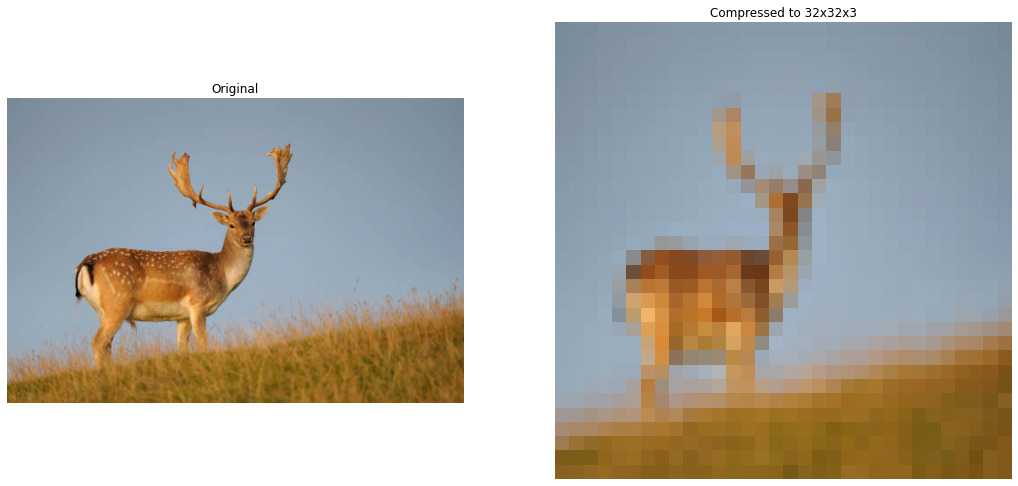

In [ ]:
deer_img = loadImage('https://media.istockphoto.com/photos/fallow-deer-picture-id1145651250?k=20&m=1145651250&s=612x612&w=0&h=F8zwduw-t7WCkX4HGTTfe6nTomjoL7S2nrqrUs5jzvU=')

This is what the model predicts.

In [ ]:
predict_class(deer_img)

deer


Lets give it an untraditional image of a cat. The model correctly predicted this one too.

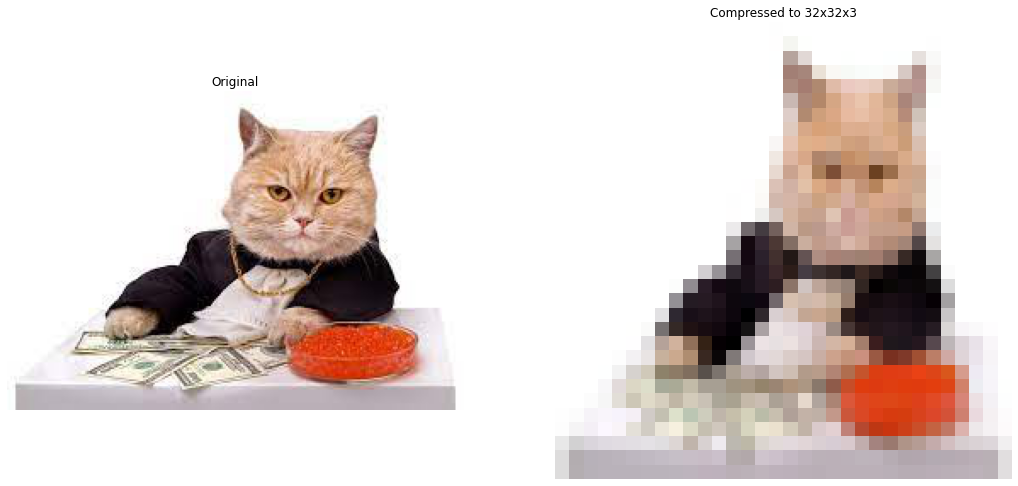

In [ ]:
cat_img =loadImage('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgWFRYYGRgZGhoZGRkZHRkYHxoaGBwZHBoYGBgdIS4lHx4rIx0aJjomKy8xNTU1HCQ7QDszPy40NTEBDAwMEA8QHhISHjQrJCsxNjQ0NjQxMTQ0NDQ0NDQ0NDQ0NDE2NjY2NDQ0PTQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQxNP/AABEIALwBDQMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAABAUCAwYBBwj/xABBEAACAQIEAwUECAUBCAMAAAABAgADEQQSITEFQVEGImFxkROBobEHMkJSYsHR8BQzcoLhkhUWI6KjssLxQ1Nz/8QAGgEBAAMBAQEAAAAAAAAAAAAAAAECAwQFBv/EACgRAQEAAgEDAwQBBQAAAAAAAAABAhEDITFBBBJRBRNhcYEUIjLh8f/aAAwDAQACEQMRAD8A+zREQEREBERAREQEREBERAREQEREDyInJJ2uC1nRwMgcqGG4sbXI5yLdJkt7OuiaqNVWUMpBUi4I5ibZKCIiAiIgIiICJrqVAouSAOpNop1AwuCCDsRA2REQEREBERAREQEREBERAREQEREBERAREQEREDwz4jiK+WvWDD/5H/7jv8Z9unxvtjgTTxlRSO7UYOpH4vDwNx7pnyb6N+DW7KveAcafDhA12ptfMDpkItqt/Aj4ztcNxqi9gHAJ5HQg9DOCxFBUw6X+6eV9G8L9Lb9JG4VmJtfVT3T4c1uNNOXmRM7ncV7xzLq+p/xCfeHqJkrg7EHyN5x+HxD8xtJSvpfmZacsql4Py6i8XnNIxPIG55j9/szFqhX8rfOT92I+zfl0xcDcyt4nxlKS7hm5AH5mclWxlRgWyk65VGtiebMTuB8bzUqBRnqAsfEi/wAbegkTl32T9mTux4jj6lS7O/8ASouAP1nV9jnzYWm3UuR/qYTheJ4lMpORL20F9+minXyM+j8DwnssPSQixVRcdCdSPUmWx7nLqYxYxETRgREQEREBERAREQEREBERAREQEREBERAREQPJxfbGhT9slSoCwVLBPvHMSNPX1naTj+NKKlbMSCqgAKbHa+tpTkuo14p/c5mo9XEm47ikd0G40k3C4UooGl7anryk6u2ljlAHK1vjNJQjUC46jXlOLLLq7McWSUCLksTe2nQdP30lhhluouNNLX58x+vuldSrhnCne1x46f8Ar4yTRrsMy7G2nnfX8vSMamp9J7g68z7hyEiagm/U+F9/kDIzV7rpzYgEa6ruxkipikVsm5AHiTobC3ult7V1p47hyRpYDQHS5/TX5SlxOCI1Vr/hQkAdbk6HpoP8WTpmN728dtNrnba99PhPLgDuju23Y7gc7dPhIxy1SxT9nuGU62LTMrdy7nUEd3UA2tbW2k+rTgezDKMULncNlsLDbawOnOd9Ovj6zbk5t+57ERNGRERAREQEREBERAREQEREBERAREQEREBERAreM4nKlhuflKXIoF2I8zym/tLWsyAa6HpzlQrZ2AJF+anQe/Wc/Jd11cU1izq2uLMvu0h6OXvIwB6FgB854+ATN37eOpPvB6TiO1PAXV6gpNq/fpE6qy6ZkW+gIsfWc+pL1/43306O3xNg9I2AuxvbkbGaMTVyOx01Q25chzvOAwOKr4P2KVajP7RgGpElrA376Em6202sDrpOmxNN8xRulgeqEaeW8ZdtwxnysOAAlULHQZj5liSfUyXhKavVqu/JrHzsNPHlpK6iWUWvlRFux30E5LinaPENRNbDFkTMw7uUt9YjMxKm5OhsAN94x8S/Jl2tfQ27+yGw+fiLi/vms0i1wfeCdPQb+W043hWOxjvTRaj95SziplYrtbUAWO86zDU6qLcvqevP3n9+Ed6eGdOkaTqwJ7pBPLY6gTvUa4BGx19Z8+q4rNsT46b/AOZ2nAqhaghPS3oSJ0cF7xz886SrGIidDmIiICIiAiIgIiICIiAiIgIiICIiAiJ5ATRi64RSx2Am+acVQDqytswsZFTO7kMfUL964uT1+V5swGEGW/Pqf0mutgMjFDqBqDcbefWYYp+4ET63IXsR75hend1Tr2b69lBzX81N7+7kPfINfKwykEj7rg2+O3nMaeIrgWY6cyB/5E2M11HY3AVyed9flp6THLHfZpjdNdPh1BbuiKr7s2pJHmdfdJ+HwpdMzfWsBtt4flN3CMJmuXIvsRdSfcATb4GV/FuIYjD1AuRBTI7rg3BNwNRuDre2u28tjj03U7uV1O7XxWmR3FIGfQ3F9N/ylfS7J0kF1qOmbVkUAqT1ANwplpw72mIHtalMoMuha13BPJATpbr12mVaoQSCGsNASGHzGu/KUyx6deyZfDZgMGtNTk57m4LNbqTYW30FhM6rW0F789L/ABufnIorGxJtb8X5aTSeJfcAtztr84kkhWeKp2Ol9eZ/Sd3wgAUadtsg/wAzhamKU22v06TvOGKRSQHfKJvw965uftEyIidDnIiICIiAiIgIiICIiAiIgIiICIiB5Of7U9qKGAQNVJZnuEprbM1tzqQAouLsfiSBOgn5t+lLiBrcQr3fMtNlpJY3ChFGYeecvfxv0hMdfjfpYxBv7OlSQcr56hH911HwlW30hcQc/wAxEG/dRQbde/ew8bicNgCCO9t8yNLSTXe/6SdLaj6X2e7RvVa9aoX1yg5bEE62JAAPuXlvOkr17C406HX4WInyfhlcph6jLqUZX99m03FgAL6fiv4XHZbtyzHJiShBOjaC3QHU+ptMLN2tZZNOuq47XR79dvjuflNtDHq+hA0HMXHx0m5Fpv8AUKm+1iD7z5fCRq6WO23MfP1lO3dpOqwocRCi1xy5C/8Ay2+Uh8UxrVMgCZ1Vg5BFhZTyH6zHD4tUvmW56/rJ9OundsQQd+e8nwmdLvT0cSDL47EG4O3h7tpX0XJJAta/Jqg9e985IxdWmLhreHWVrYgW7mnj8v34yt6pn4T8Riktl263BI8tx8ZFFJHGw/tII+NiPePfIeRr3JuBt1APKasTxCnS7zsFPIePL1OkjWzejjNUUEZ2uNLLoT+xO2+j3i5xOBpOx765qbdboxUE+JXKffPiPFu1T1H00QaMm4/rAIsCPW3Maz6X9DvEKb0K1MZQwqe0yjmGVVJA81sfMX3nRhj7Y5uTL3PpUREuyIiICIiAiIgIiICIiAiIgIiUfaPtHQwSZ6rd4/UprYu58F5Dqx0HpAu5GxmOp0lzVaiU1+87Kg9SQJ8L7R/SHi65Ko5oJrZaRIYj8VT6xPllnF16zMczMWY/aYkk+bHUydLafoTtF22w1LDVKlDEUatQDKiU3RyXbRSVUk5RufAGfnSqCS2ZizEkkk3JJ1JJ6k39Zg9U313msVSTZt+R/Iwdm7DsQPIyUxJ1kRH185LpvpJSs+zzZnekTYVaboPMa2HiVzj3zm6gKnTT/POXGDqMKtNqaF3DjKgBJc/dAGpvO94N9H9OtUatWPdVgBRWw1Ci5qEW3a7ZVA390y3rP9r2bx/TjOAcRxWHpmqqOadrAhWKkjS5bawtv4S1o/SHUJUOoZcpB65jYhtPO1hPqlbCIi20VVFgBpYDkANhKPG9mqD3d6CFiNBlW48zbeMrPgx34riq/br6yqi3GtydCfCQqPbuoFN0W99OVgT+/hOuXshh9B7FPaZLleWptmt0uDI2K7GUirBqaoNe8tlI0Oot08ZWe34Tbl8qSj2qNS6omaoSCN7W5m/Kw38pm/bREDKqBiCACTcGx1II3Hl0NpzuPAwqNRUhne+ZhpZblQtuZIB8BmO+hlBlJkzGXr4Rc7Onl1j9rqrC2axBvp0028R+s5/GcTeo2ZmJ950vvboPDaRFSZZZeSKXK1mamzc9m8SOvmPzlt2d45UweIWtSOqm5UnR15q1uRGnhe/KU67Efu4/ZninWSq/W/CsemIo069M3SoodfJhex6EbEdRJ0+VfQZxcvQrYZjf2TB0/oqXuo8mUn+6fVYQREQEREBERAREQEREBESj7UdoqOBoGtWPgiD6zva4VfzOwECs+kHtP/BUB7Mj21Ulad9coFszkHe1wB4sOV58FxmNZ3Z3dndjdmYliT4kyRx/j9XG13rMjMWsFVblUVdkB6bnxJJ5yiq1SDqrDz0/KTuLSJjV5qaoDy9JpV+ohnhLyowO/wDkSMdN9pm7zSWhFbWf9+Mn8Jw9SvUSjTUu7mygfEk8gBqTyAkLC4V6jZKVNnY37qKXOnMAC8+8fR/2RTBUs7gHEOoztocgOvs0PQaXI3I6ARsjf2R7KU8EuY2euws9S2190S/1V8dzbXkBNx+ZHarTGrAB1P2gL2t4y5KTW+HBFjM8sfcvjdKRcfSc3Z8oVlBVgQdTppzHiNNJsxnFVuwRkIHO48tT56SX/s4XsQGXexHpaQ8ciI65EFze+l9euszuOfzGkuKFQxCU2eo5NSqe6VUfVAP1NdBvfxnHdsO2LKciKA3S98vixB18p0vbLjiYWlYAZ35CwJJ5D99Z8gxNGsS1R6dQZiWLFWtrruRt+kY4W970RcpOyLiazu5dzdjz8thMAk2iop0vMlQzdk1ZZiyzeUmJSSI5WY2kgpPAkIdX9FdLEHiNI0Li1zWP2fY6Bw3W9wAPvZTyn6Rnyf6CsNaniamXd0QH+lSxW/8Aep98+sSEV7ERCCIiAiIgIiICJiTaV2N4klPLnJAY5VCqzMxtc91QTaBMepfQev6Tg+NcEbEYx3xQV6VMKlBDrYMqs7G/MtcX/COk6leM0trvz+w/LfS05vivE+8WB0zb25XsND4SmWUk6L4zq8pcOog5URBbwEqeNcHpEHMoNx9kXteTExjlmAIubZbm2Yg6gdTa5t4SPXx4Ab7xFgeY118tpz210TT59xHs8pJyjQXPp0HTxnH1BlJXpO/7RcbpUlKg5na+gt3fE38p8+dWYlrMbm97Hn4zbjl71lnZ4aWMtOzlKm1dBWpvUp3syoSDrzuOnmPfser7Hdi1qKa2KRygy5UBKZhrmLEC4FgNBrrPqXBOG4EoHwtKkttCVVc6sNMr6ZgfEzTbPT3s9wfC0Fvh6K08wBOZWznbRme55beMvDVUfWZfW0jrTZdpsRzzHwk1KSq31FiPDWY1NB7r+kj1S32QB46CRHrV12KsOjW/OVtTIkvVGo5jf5/KVTJ38xPnN2LxS2BcAEG+huM1rXN5BQkqLG99LnUkDS5PW8rlkvjElWTOX7uY87DMB0vvaacTQLto48Rqfl5yLUrgEi4uNbac9Ofl8JWtiMrMc1jY2ba3Unl09Jz5Zderoxw+GrjXZlKoNwl7HUqrHnztces+a8W4NUw7Hmvh+hn01uIlBdtyLkadPfKjG4jPsEA5HKjWJ23Ej7+OHetsfS58n+M2+c/xA5kXmPtOhHrO3q4NiLjEVx/S5A9Nh5TJcOxtbE4gAb99yDpprm0uRLT1mBfpnN3cOgubbnoJaYHgzuQDoDyGp/QfGdghZb3esSOftH999ZNpcQZPrKGa4sWObQ201vr75H9bhvWqm/TOaTfRY9leHewQICQDyubXPPznYUlPU+pnH4bjIsMws34bWPgQdb+R6S9wPG0bcjxI3HiyHW3ipaa4eo48rqXq5uT0nLh1sdBSkpNwZGw9iARYg6gjW/lJSidDkT4mCbCZyFSIiAmDuBvPWa00kX3gaajFj0EgYFxVc1QQUAKJYg3W/ff+4gDyQdZNxOGLgqGK+I3lJ/u0b6V9Dy9jh2/7kMrl7vEWmlqy0FH1FtbkgOhPgvUzl+0XCaVUH2RRboS1jlzEWUXBUiw2v1uNxY3tLs/Y3Lhj19miH1TLPMZgKKAGpUA6A3Y/2qxYn3TPV8w/lwdDsuwyB67FVdWszcgAMwKqWvmYWHQnXeWH+6WDLF6lWtmJ1XP3Rc5dsoHTXzlu1MP/ACaQsTZXqU6Q1sT3RkvsDzvptN+E4SLD2ju/grGmdL3YKgB3sLnKLcuZhM6eVI/DMNS0ouuW2tmRW8iCuYjbXWYYemzuQM+Uaq61bX/tWnofn4zpqnCaLj+ZWQ9P4isB7xnt6SrxnZKnbM1d2To9R2Xysxa8tPyNFXCs6sC9UE8gxN/+hpKJ+E1M4IWoxGzvVzH/AJkEsG7NYdBnzBEvqwCIPUoCx8rkyTh01BpIio2zvTVC/wD+aIud/O3nK35qZUF8NiCLFqi+VVV93dcEyvr4etRsTUrKTqM1VNbcwHqa+YM7algKrAkqA1rB3y6fiVBnA6gMT5SKeCLTVnzZ33cklz4FyxJI5XG3kI1flbaDgOPE0wtRxnAPNGa2oBIRmHxkTF8VqEkKpU6d59QR+FFbOfSbsdgVNqtL/h1ltsDZuhub5SdtTlbrJ/BMcjsA6LTq36LlcjmAdVa97jQ3vFlvlMs+FL/CO4zVHOQ/dD0gdL/XKHlf7U01+JKndRlCBAF76sR1HXrqRzndYhEqDIx1Gu2UgjTMAdx6iczj+z1EtfMt9TYNl9RqPjExh7q5PAYsutVlJZs4LW17puAB6HTwmVaox1bYNqOu+hI21H7tL0YFcOrmxyuMtiF031AAHylSyKSO6bfvWcvPbOkr1fRY45zeU7IlUnU7763JGnMXmDg3tfUb+4C1zabqlIaWNgRba+3U3hkH3l1/qHrprOGyzu9nG466NRTu769NyBqQQbfmZiQefvbfa1ht0m4KNRmQ3FtTbKbg3X98zPHTndb2635W0lbtaZRi9hpzHW999/d0M99oTuefyvrb984sLjvC/UXPj0198zSkDz38PzJk+2+D3TXUCaEi5A0FhpckWHx+Uk4bEEXyjvCxz/dPPz8vE7wlNVBOW9tbE/kLDnN9OkSwLnQagA6Ha2nnzmuHF1lc/LnNV3/ZymVoICddT5AsSB7pcrKDg+KuoEvKbaT2sL0j5Xkxsyu0ukdJsmigd5vksnk11KlvOaOIYsU1DEE3NtPEH9JXji1M/Zb4QLAPrNolYvE6fRvhNq8TT8XwlkpjzQ9YKCd7fZGpPgBzms8Rpn73w/Wefx9P8XoP1kXfgU+J4rXqMyKrUFAJu4CuwB+yzd0E8gL/ANSzDBcFdjmbug7s59o7G+mt+7bWxJY+cuv4yl0t5AD5GYNVoHXLY9QAD67ylxqdtuHwAQZQ72tzYknzJOn9oXeROI8H9ptUKqPs5cw87XtfxsZs9qn2XceeZvmbfCR8Tjaqj/hlX/rP/iqL85S42GpVdTwSIxKAsyWJZsqKPFjuNuZ8LazXVqvUJylXABLOSVRfNja3w3JHSY4dmd1Wrotwcq9xFsPw6t8Dra9p01IURbVTl+qLWCnqq7A+O/jJmNpJMXJ1giVFzqzvlDhnuUCHUtRp7OVOpuB4CXK1KKNdnBdtVqEOWKnYs9gMu40sB4ayTxilTrKFDZXDXR7Huvy9xNgRKDJZclYIg3sXQlG1zZQDmKHQ5dNeZkZY/KdrPH8OqVTZXKEbr97U97MNfdt08McHwKorq7VrZeS5jm52a9tJlhOMqqhFZqhH2rE+7ULoPM+cn+1YjV1XyX5qQfg0iS1Gp5QsdwUMe4QAdwRew3IA5qbfV5cthasx3CbrrkR1tlIKgOATo2m/MPYEadJemkp+vVY+ABt71bMJgaFEcz5d4D/SLL8JaY5LbUGExTumSuHQgHJUfu+QcNa55aA3mzC8NdhrWOQ//WFQnkTnGZjfxIl0q0l+rlXyW3yENWT7/wADJmPynanxnAKWQ5EGbe5GYkjqz3Y+V7Tj8QHQlT6G/wD7n0b26fe+BkXFYbD1PrkH3H5ynJwzJ08Hqbx/p83apbQadb/5mp25HXmJ1+M7L0G1Ss6HyJEpsR2Zdfq1lbzS3xnHl6TLxXp4fU8PMUtwdNBr6T0MNpN/2JWB1yEeTj5S0ThVK2qa+b/k4mX9Jn+Gt+p8PxVFQca7Dlrr0mYrfeOnT/M6CnwykPsIP9Z+DORJ2HwSjYoniqBT6qBNMfS5/LLL6lh4l/lzFMN9cqQPEGx9ZPwmHZyCFYeJ59Mq9PGdJTwNG92e58jLGh7FdmHoZvh6bXdy8nr7l/p7wnClVFxaXlMaSup46mPt/AzcvEaf3vgZ14zU08zPK5XaxpnUSRKlOI07jv8APof0ltJUqp7R/wAof1j5NOZBnS9pP5Q/rHyacyIJ2ZCe3mM9lksg0yDzCeQN2eZCpI8QJPtZkKsixA35xMvayLEJSXqgqQdZUNghe42k4zGRZsbsKFQaCSjiZBE9JgSWxJmtqpmmJIyLzEtPJ5IGUTyIHsGeRAwZJgac2zGBrCTILMplAwyz0CZieiB4BMhAiBku87icKJ3UhWv/2Q==')

In [ ]:
predict_class(cat_img)

cat


Lets give it a hard image. The model was probably able to tell that the image had wheels and a hood, but it failed to predict 'automobile' over 'truck'

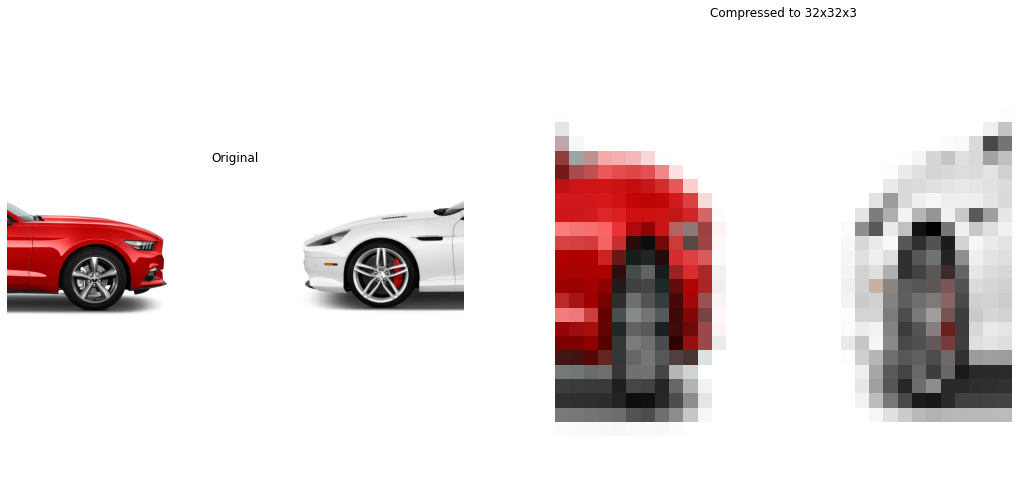

In [ ]:
car_img = loadImage('https://www.izmostock.com/wp-content/uploads/2018/04/izmostock_MainBanner_04.jpg')

In [ ]:
predict_class(car_img)

truck


A cartoon image of a ship. The model guessed correctly again.

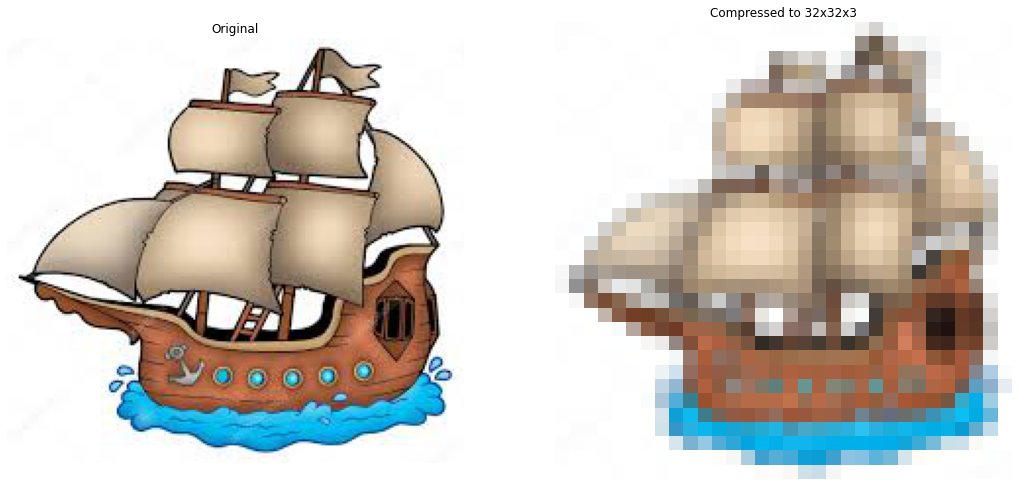

In [ ]:
ship_img = loadImage('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSOD3YIEUhzgWXVMbpLZLFjOVqg6QRH6nzGGw&usqp=CAU')

In [ ]:
predict_class(ship_img)

ship


An image of a frog

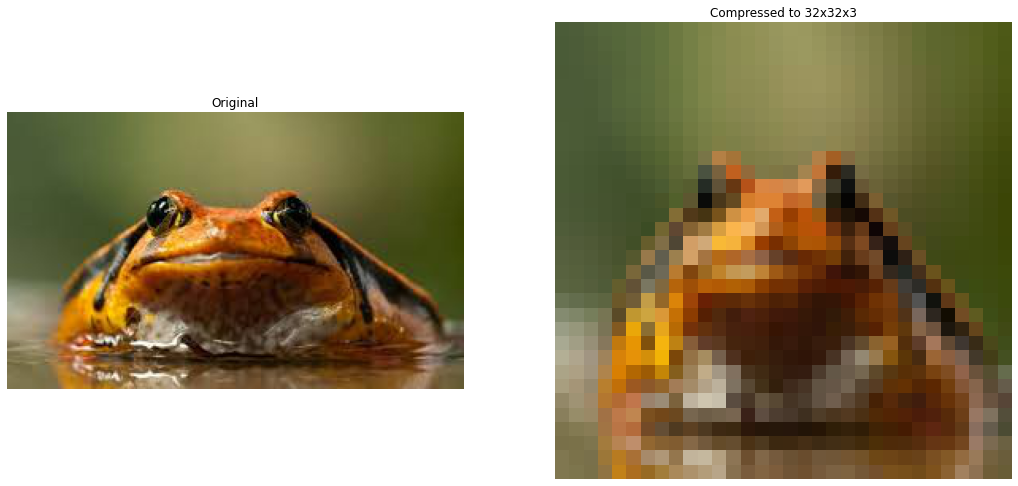

In [ ]:
frog_img = loadImage('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMG4yexr2eOfzLDq9C-VZGPU8BL7B0wE2l9g&usqp=CAU')

In [ ]:
predict_class(frog_img)

frog
